In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 8, 6

In [2]:
#load cleaned data
data = pd.read_csv('data/clean_titanic.csv')

# 1. Automatic Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having too many irrelevant features in your data can decrease the accuracy of the models. 

Three benefits of performing feature selection before modeling your data are:

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.

You can use the following approach

- Univariate statistics: Check statisticall significance relation between feature and target
- Model-base selection:
- Iterative selection:


**Univariate statistics** 
- Check statisticall significance relation between feature and target.
- select the one with high confidence

Advantage: Very fast to compute, doesnt require building models

Disadvantage: Independent of the model

** Model-based Feature Selection**
- Use a supervised machine learning model to judge the importance of each feature.

Advantages: Consider all features at once.

**Iterative Feature Selection**
A series of models are built with varying number of features. Implemented in Sklearn as [Recursive feature elimination (RFE)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

## 1.2.  Model - based feature Selection : Using **Feature Importance**

Using RandomForest Classifier

In [3]:
# Load the packages for modeling
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Define a classifier
rforest = RandomForestClassifier(max_depth=15,n_estimators=70, min_samples_leaf=50,
                                  min_samples_split=100, random_state=10)

In [5]:
# Prepare Feature and Target
data.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked'],
      dtype='object')

In [6]:
feature = ['pclass',  'sex', 'age', 'sibsp', 'parch','fare', 'embarked']

In [7]:
X = data[feature]
y = data.survived

In [8]:
# Fit the model
rforest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

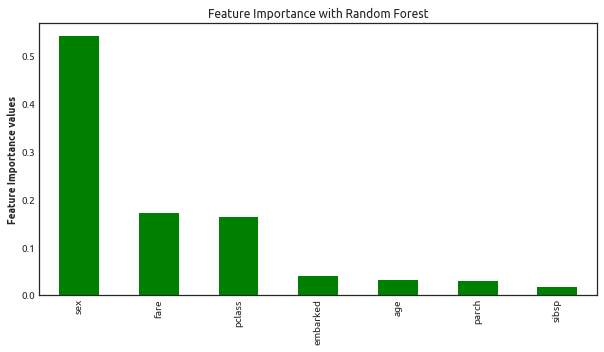

In [9]:
# Plot the important features
imp_feat_rf = pd.Series(rforest.feature_importances_, index=X.columns).sort_values(ascending=False)
imp_feat_rf.plot(kind='bar', title='Feature Importance with Random Forest', figsize=(10,6),color='g')
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)

## 1.3 Model - based feature Selection : Using **SelectFromModel**

In [10]:
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42) , threshold="median")

In [11]:
select.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold='median')

In [12]:
X_features = select.transform(X)
print('Original features', X.shape)
print('Selected features', X_features.shape)

Original features (1309, 7)
Selected features (1309, 4)


Print the selected features

In [13]:
for feature_list_index in select.get_support(indices=True):
    print(feature[feature_list_index])

pclass
sex
age
fare


Feature selected are: pclass, Sex, age and fare

## 2 Evaluate the Performance of Machine Learning Algorithms

**Motivation**: Need a way to choose between machine learning models
- Goal is to estimate likely performance of a model on out-of-sample data

The evaluation is an estimate that we can use to talk about how well we think the algorithm may actually do in practice. It is not a guarantee of performance.

Once we estimate the performance of our algorithm, we can then re-train the final algorithm on the entire training dataset and get it ready for operational use.

Several approach:
- Train/test split
- Cross validation

## 2.1 Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on different data.
- The simplest method that we can use to evaluate the performance of a machine learning algorithm.
   - Take yur original dataset, split it into two parts. 
   - Train the algorithm on the first part, make predictions on the second part and evaluate the predictions against the expected results.
- The size of the split can depend on the size and specifics of your dataset, although it is common to use 75% of the data for training and the remaining 25% for testing.  


**Advantage**
- is very fast. It is ideal for large datasets
- use this approach when the algorithm you are investigating is slow to train.

**Problem with train/test split**
- It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
- Testing accuracy can change a lot depending on a which observation happen to be in the testing set
   

## 2. 2 Cross validation
- Statistical method for evaluating how well a given algorithm will generalize when trained on a specific data set.
-  An approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single train-test set split.
- In cross validation we split the data repetedely and train a multiple models.


**Advantages of cross-validation**:
- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data
   - This is because every observation is used for both training and testing



**Types of cross-validation**

- K-fold cross validation
- Startified K-fold cross validation
- Leave-one-out cross validation


### 2.1.1 K-fold cross validation
- It works by splitting the dataset into k-parts (e.g. k=5 or k=10). 
- Each split of the data is called a fold. 
- The algorithm is trained on k-1 folds with one held back and tested on the held back fold. 
- This is repeated so that each fold of the dataset is given a chance to be the held back test set.
- After running cross validation you end up with k different performance scores that you can summarize using a mean .

**Note**: K can be any number, but K=10 is generally recommended
- This has been shown experimentally to produce the best out-of-sample estimate

### 2.1.2 Startified K-fold cross validation

- In stratified k-fold cross-validation, the folds are selected so that the mean response value is approximately equal in all the folds. 
- In the case of a dichotomous classification, this means that each fold contains roughly the same proportions of the two types of class labels

### 2.1.3 Leave-one-out cross validation

- Leave-one-out is the degenerate case of K-Fold Cross Validation, where K is chosen as the total number of examples
- For a dataset with N examples, perform N experiments
- For each experiment use N-1 examples for training and the remaining example for testing

## 2.2 Motivation for Cross Valiadtion

Validation techniques are motivated by two fundamental problems in ML.

- Model selection and tuning: How do we select the “optimal” parameter(s) or model for a given
classification problem?
- Performance estimation: Once we have chosen a model, how do we estimate its performance?


## 2. 3 Evaluation Metrics 

**Classification Metrics**
- Accuracy: the number of correct predictions made as a ratio of all predictions made.
- Confusion matrix: a handy presentation of the accuracy of a model with two or more classes.
- Precision:
- Recall:
- F-score:

**Regression Metrics**
- Mean Absolute Error
- Mean Squared Error


[link](http://scikit-learn.org/stable/modules/model_evaluation.html)

## 2.4 Three-way data splits
If model selection and true error estimates are to be computed simultaneously, the data needs to be divided into three disjoint sets.

- **Training set**: a set of examples used for learning: to fit the parameters of the classifier.
- **Validation set**: a set of examples used to tune the parameters of of a classifier.
- **Test set**: a set of examples used only to assess the performance of a fully-trained classifier.

Note: After assessing the final model with the test set, YOU MUST NOT further
tune the mode

## 2.5 Practical Procedure
1. Divide the available data into training, validation and test set
2. Select architecture and training parameters
3. Train the model using the training set
4. Evaluate the model using the validation set
5. Repeat steps 2 through 4 using different architectures and training parameters
6. Select the best model and train it using data from the training and validation set
7. Assess this final model using the test set 

## 3 Model Selection

How do you choose the best model for your problem?

When you work on a machine learning project, you often end up with multiple good models to choose from. Each model will have different performance characteristics.

Using resampling methods like cross validation to evaluate and select the best model.


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from time import time

In [26]:
feature = ['pclass',  'sex', 'age','fare']
X = data[feature]
y = data.survived

In [16]:
def classifiers(X_train,y_train, score='f1'):
    knn     =  KNeighborsClassifier()
    svm     = SVC()
    gnb     =  GaussianNB()
    log     =  LogisticRegression()
    dTree   =  tree.DecisionTreeClassifier()
    rForest =  RandomForestClassifier()
    mlp     =  MLPClassifier()
    adboost = AdaBoostClassifier()
    lda     = LDA(solver='lsqr', shrinkage='auto')
    qda     = QDA()
    
    model_names = ["Nearest Neighbors",
                   "Support Vector Machine",
                   "Naive Bayes",
                   "Logistic",
                   "Decision Tree",
                   "Random Forest",
                   "MLP",
                   "AdaBoost",
                   "LDA",
                   "QDA"]
    models = [knn,svm, gnb, log, dTree, rForest, mlp,adboost,lda,qda]
     
 
    avg_results = []
    model_time =  []
    
    for (i,model) in enumerate(models):
      
        skfold = model_selection.StratifiedKFold(n_splits=10)
        start = time()
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=skfold, scoring=score)
        end = time()
        avg_results.append(cv_results.mean())
        msg = "%s: %f" % (model_names[i], cv_results.mean())
        print(msg)
        model_time.append((end - start))
        
    return avg_results, model_names,  model_time   

In [29]:
result, names,  model_time  = classifiers(X,y)

Nearest Neighbors: 0.478656
Support Vector Machine: 0.443737
Naive Bayes: 0.680994
Logistic: 0.684824
Decision Tree: 0.623877
Random Forest: 0.644404
MLP: 0.518486
AdaBoost: 0.652721
LDA: 0.686187
QDA: 0.570519


In [18]:
def plotbar(plot_name, names, result,title,ylabel):
    postion = np.arange(len(names))
    plt.bar(postion, result, align='center', color ='g')
    plt.xticks(postion, names, rotation=90)
    plt.ylabel(ylabel)
    plt.ylim(0,1)
    plt.title(title)
    #plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

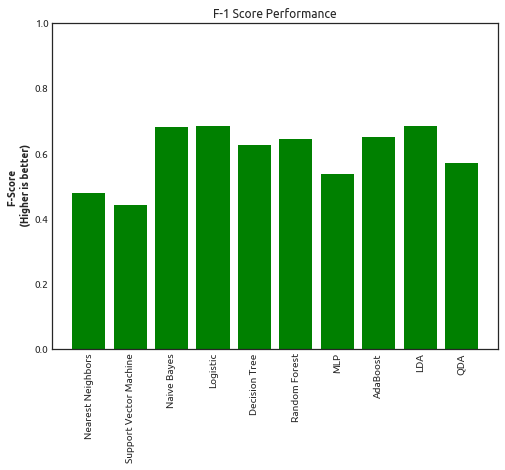

In [19]:
plotbar("avg_score", names, result, "F-1 Score Performance", "F-Score \n (Higher is better)")

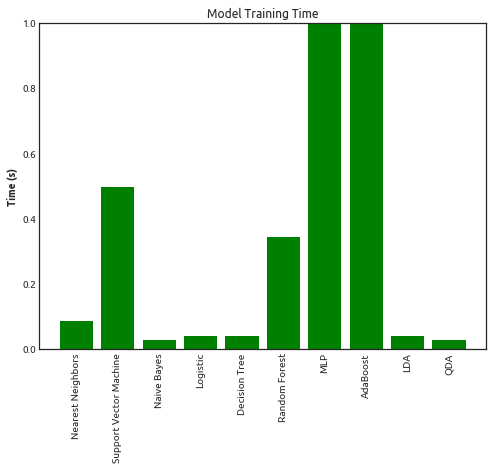

In [27]:
plotbar("avg_score", names, model_time, "Model Training Time", "Time (s)")

From the above experiment, will consider Random Forest and KNN models in the next experiment.